_Lambda School Data Science, Unit 2_
 
# Regression 2 Sprint Challenge: Predict drugstore sales 🏥

For your Sprint Challenge, you'll use real-world sales data from a German drugstore chain, from Jan 2, 2013 — July 31, 2015.

You are given three dataframes:

- `train`: historical sales data for 100 stores
- `test`: historical sales data for 100 different stores
- `store`: supplemental information about the stores


The train and test set do _not_ have different date ranges. But they _do_ have different store ids. Your task is _not_ to forecast future sales from past sales. **Your task is to predict sales at unknown stores, from sales at known stores.**

In [1]:
import pandas as pd
train = pd.read_csv('https://drive.google.com/uc?export=download&id=1E9rgiGf1f_WL2S4-V6gD7ZhB8r8Yb_lE')
test = pd.read_csv('https://drive.google.com/uc?export=download&id=1vkaVptn4TTYC9-YPZvbvmfDNHVR8aUml')
store = pd.read_csv('https://drive.google.com/uc?export=download&id=1rZD-V1mWydeytptQfr-NL7dBqre6lZMo')
assert train.shape == (78400, 7)
assert test.shape == (78400, 7)
assert store.shape == (200, 10)

The dataframes have a variety of columns:

- **Store** - a unique Id for each store
- **DayOfWeek** - integer, 1-6
- **Date** - the date, from Jan 2, 2013 — July 31, 2015.
- **Sales** - the units of inventory sold on a given date (this is the target you are predicting)
- **Customers** - the number of customers on a given date
- **Promo** - indicates whether a store is running a promo on that day
- **SchoolHoliday** - indicates the closure of public schools
- **StoreType** - differentiates between 4 different store models: a, b, c, d
- **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
- **CompetitionDistance** - distance in meters to the nearest competitor store
- **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
- **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
- **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

This Sprint Challenge has three parts. To demonstrate mastery on each part, do all the required instructions. To earn a score of "3" for the part, also do the stretch goals.

## 1. Wrangle relational data, Log-transform the target
- Merge the `store` dataframe with the `train` and `test` dataframes. 
- Arrange the X matrix and y vector for the train and test sets.
- Log-transform the target for the train and test set.
- Plot the target's distribution for the train set, before and after the transformation.

#### Stretch goals
- Engineer 3+ more features.

In [3]:
#Merge store into train and test then have a quick look
train_store = train.merge(store, how = 'left')
test_store = test.merge(store, how = 'left')
train_store.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
45182,914,2,2014-02-04,12071,1366,1,0,c,c,2640.0,4.0,2011.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
12447,511,2,2015-03-03,6182,826,1,0,a,a,2060.0,9.0,2009.0,0,NaN,NaN,NaN
39261,679,1,2014-04-14,14561,1374,1,1,a,a,4140.0,9.0,2012.0,0,NaN,NaN,NaN
70322,248,1,2013-04-08,10304,1275,1,1,a,c,340.0,9.0,2012.0,1,40.0,2012.0,"Jan,Apr,Jul,Oct"
54770,801,5,2013-10-11,5091,497,1,1,d,a,48330.0,4.0,2013.0,0,NaN,NaN,NaN
46081,912,5,2014-01-24,5159,689,1,0,c,c,3100.0,5.0,2010.0,0,NaN,NaN,NaN
24137,379,2,2014-10-14,3096,433,0,0,d,a,6630.0,NaN,NaN,0,NaN,NaN,NaN
30089,1002,2,2014-08-05,6201,727,1,1,d,c,1130.0,11.0,2008.0,0,NaN,NaN,NaN
26924,257,3,2014-09-10,4257,579,0,0,a,a,420.0,12.0,2012.0,0,NaN,NaN,NaN
48588,988,1,2013-12-23,9160,1250,0,1,a,a,30.0,11.0,2012.0,0,NaN,NaN,NaN


In [5]:
from sklearn.model_selection import train_test_split
#Split the data by store id so we can predict on unknown ids
trainval_stores = train_store['Store'].unique()
train_stores, val_stores = train_test_split(trainval_stores, random_state = 42)
train_split = train_store[train_store['Store'].isin(train_stores)]
val_split = train_store[train_store['Store'].isin(val_stores)]

In [6]:
#Check the split
train_split.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,8,5,2015-07-31,8492,833,1,1,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
2,11,5,2015-07-31,10457,1236,1,1,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
3,12,5,2015-07-31,8959,962,1,1,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
5,44,5,2015-07-31,6670,665,1,1,a,a,540.0,6.0,2011.0,0,NaN,NaN,NaN
6,48,5,2015-07-31,3874,390,1,1,a,a,1060.0,5.0,2012.0,0,NaN,NaN,NaN


In [7]:
#Establish X matrices of features and y vector of target
target = 'Sales'
X_train = train_split.drop(columns = target)
X_val = val_split.drop(columns = target)
X_test = test_store.drop(columns = target)

y_train = train_split[target]
y_val = val_split[target]
y_test = test_store[target]

In [8]:
import numpy as np
#Log transform y vectors
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

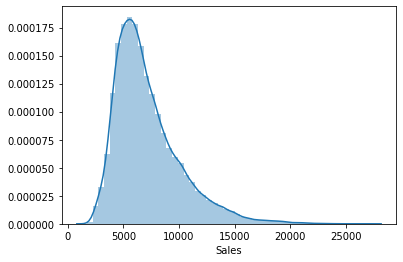

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
#Quick and easy distribution plots to compare them
sns.distplot(y_train)

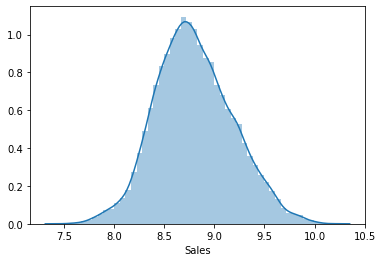

In [10]:
sns.distplot(y_train_log)

## 2. Fit and validate your model
- **Use Gradient Boosting** or any type of regression model.
- **Beat the baseline:** The estimated baseline Root Mean Squared Logarithmic Error is 0.90, if we guessed the mean sales for every prediction. Remember that RMSE with the log-transformed target is equivalent to RMSLE with the original target. Try to get your error below 0.20.
- **To validate your model, choose any one of these options:**
  - Split the train dataframe into train and validation sets. Put all dates for a given store into the same set. Use xgboost `early_stopping_rounds` with the validation set. 
  - Or, use scikit-learn `cross_val_score`. Put all dates for a given store into the same fold.
  - Or, use scikit-learn `RandomizedSearchCV` for hyperparameter optimization. Put all dates for a given store into the same fold.
- **Get the Validation Error** (multiple times if you try multiple iterations) **and Test Error** (one time, at the end).
  
#### Stretch goal
- Optimize 3+ hyperparameters by searching 10+ "candidates" (possible combinations of hyperparameters). 

In [ ]:
#I had to reinstall my local and forgot to install these via commandline, that will be fixed
#after the first commit for this notebook
!pip install xgboost

In [ ]:
!pip install category_encoders

In [12]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.pipeline import make_pipeline
import category_encoders as ce

#Create easy to use rmse and rmsle
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

encoder = ce.OrdinalEncoder()

In [13]:
#Encode X train and val
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

In [14]:
#Establish a model to fit to non log transformed data and one for log trasnformed
model = XGBRegressor(n_estimators = 1000, n_jobs = -1)
model_log = XGBRegressor(n_estimators=1000, n_job=-1)

In [15]:
#Established log and non log eval sets for early stopping rounds parameter
eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]
eval_set_log = [(X_train_encoded, y_train_log), 
            (X_val_encoded, y_val_log)]

In [27]:
model.fit(X_train_encoded, y_train, early_stopping_rounds = 50, eval_set = eval_set)

[20:53:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:7001.61	validation_1-rmse:6128.52
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.


C:\Users\charl\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\charl\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[1]	validation_0-rmse:6329.98	validation_1-rmse:5467.59
[2]	validation_0-rmse:5727.05	validation_1-rmse:4884.07
[3]	validation_0-rmse:5186.63	validation_1-rmse:4362.45
[4]	validation_0-rmse:4701.31	validation_1-rmse:3891.17
[5]	validation_0-rmse:4267.19	validation_1-rmse:3477.72
[6]	validation_0-rmse:3878.27	validation_1-rmse:3106.09
[7]	validation_0-rmse:3531.3	validation_1-rmse:2778.47
[8]	validation_0-rmse:3220.44	validation_1-rmse:2498.42
[9]	validation_0-rmse:2944.2	validation_1-rmse:2249.2
[10]	validation_0-rmse:2697.93	validation_1-rmse:2039.56
[11]	validation_0-rmse:2478.51	validation_1-rmse:1854.81
[12]	validation_0-rmse:2284.15	validation_1-rmse:1698.46
[13]	validation_0-rmse:2111.83	validation_1-rmse:1574.58
[14]	validation_0-rmse:1959.59	validation_1-rmse:1466.24
[15]	validation_0-rmse:1825.91	validation_1-rmse:1375.42
[16]	validation_0-rmse:1708.12	validation_1-rmse:1304.94
[17]	validation_0-rmse:1605.35	validation_1-rmse:1252.1
[18]	validation_0-rmse:1514.84	validation_1-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [17]:
model_log.fit(X_train_encoded, y_train_log, early_stopping_rounds = 50, eval_set = eval_set_log)

[20:49:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:7.47822	validation_1-rmse:7.39615
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:6.73096	validation_1-rmse:6.64893
[2]	validation_0-rmse:6.05845	validation_1-rmse:5.97748
[3]	validation_0-rmse:5.45322	validation_1-rmse:5.3726
[4]	validation_0-rmse:4.90853	validation_1-rmse:4.82896
[5]	validation_0-rmse:4.41836	validation_1-rmse:4.34105
[6]	validation_0-rmse:3.97724	validation_1-rmse:3.90139
[7]	validation_0-rmse:3.58028	validation_1-rmse:3.50594
[8]	validation_0-rmse:3.22305	validation_1-rmse:3.14983
[9]	validation_0-rmse:2.90161	validation_1-rmse:2.82914
[10]	validation_0-rmse:2.61238	validation_1-rmse:2.54134
[11]	validation_0-rmse:2.3521	validation_1-rmse:2.28286
[12]	

[135]	validation_0-rmse:0.074759	validation_1-rmse:0.148515
[136]	validation_0-rmse:0.074623	validation_1-rmse:0.148447
[137]	validation_0-rmse:0.074516	validation_1-rmse:0.148384
[138]	validation_0-rmse:0.074381	validation_1-rmse:0.148694
[139]	validation_0-rmse:0.074258	validation_1-rmse:0.148715
[140]	validation_0-rmse:0.074069	validation_1-rmse:0.148849
[141]	validation_0-rmse:0.073856	validation_1-rmse:0.148667
[142]	validation_0-rmse:0.073765	validation_1-rmse:0.148606
[143]	validation_0-rmse:0.07364	validation_1-rmse:0.148623
[144]	validation_0-rmse:0.073562	validation_1-rmse:0.148608
[145]	validation_0-rmse:0.073451	validation_1-rmse:0.148492
[146]	validation_0-rmse:0.073339	validation_1-rmse:0.148767
[147]	validation_0-rmse:0.07305	validation_1-rmse:0.14904
[148]	validation_0-rmse:0.072805	validation_1-rmse:0.148997
[149]	validation_0-rmse:0.072652	validation_1-rmse:0.149287
[150]	validation_0-rmse:0.072452	validation_1-rmse:0.14959
[151]	validation_0-rmse:0.072286	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_job=-1, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [28]:
#Make non log predictions
y_pred = model.predict(X_val_encoded)

In [29]:
#Make log predictions and print the comparison
y_pred_log = model_log.predict(X_val_encoded)
print(f'RMSE: {rmse(y_val_log,y_pred_log)}')
print(f'RMSLE: {rmsle(y_val, y_pred)}')

RMSE: 0.14675346731105396
RMSLE: 0.1607537555696156


## 3. Plot model interpretation visualizations
- Choose any one of these options:
  - Permutation Importances plot
  - Partial Dependency Plot, 1 feature isolation
  - Partial Dependency Plot, 2 feature interaction
  
#### Stretch goals
- Plot 2+ visualizations.
- Use permutation importances for feature selection. 

In [ ]:
!pip install pdpbox

In [39]:
!pip install eli5

  Stored in directory: C:\Users\charl\AppData\Local\pip\Cache\wheels\2b\67\89\414471314a2d15de625d184d8be6d38a03ae1e983dbda91e84
Successfully built tabulate


In [40]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, 
                                 scoring='neg_mean_squared_error', 
                                 cv='prefit', 
                                 n_iter=5, 
                                 random_state=42)

In [42]:
#fill na for permuter
X_val_no_na = X_val_encoded.fillna(0)

In [43]:
#Fit permuter and get importances for pdp plot
permuter.fit(X_val_no_na, y_val_log)
feature_names = X_val_encoded.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.2143 ± 0.0020,Customers
0.0089 ± 0.0001,Store
0.0079 ± 0.0005,Promo
0.0051 ± 0.0002,Promo2SinceWeek
0.0032 ± 0.0001,StoreType
0.0023 ± 0.0001,Date
0.0013 ± 0.0001,Assortment
0.0004 ± 0.0001,DayOfWeek
0.0001 ± 0.0000,PromoInterval
0.0001 ± 0.0000,SchoolHoliday


In [44]:
from pdpbox.pdp import pdp_isolate, pdp_plot
#Create a pdpplot using the Customers feature
feature = 'Customers'

isolated = pdp_isolate(model = model,
                       dataset = X_val_encoded,
                       model_features = X_val_encoded.columns,
                       feature = feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x10f2ad4c6a0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x10f2b05e160>})

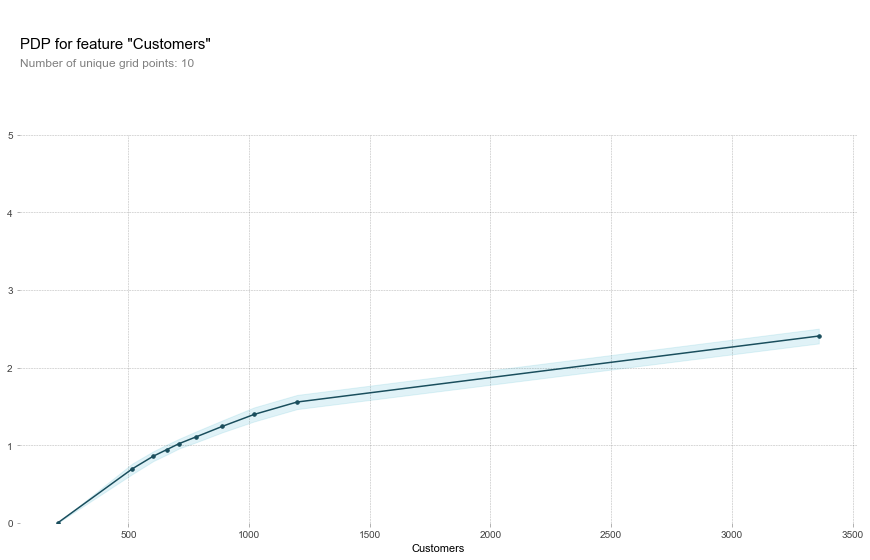

In [45]:
pdp_plot(isolated, feature_name = feature)